In [1]:
import sys
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.stats import kendalltau

sys.path.append('../lib/')

import pandas as pd
import numpy as np

# Import self-defined libraries
import sweden


# Initialise an object for storing the ground-truth data including zones
data_sweden = sweden.GroundTruthLoader()

# Load zones
data_sweden.load_zones()

# Create boundary for later use
data_sweden.create_boundary()

# Load ground-truth survey data into ODM form
data_sweden.load_odm()

# Load population data
data_sweden.load_population()
probability_survey = data_sweden.odm.values


# read ODM_tot
ODM_tot = pd.read_csv("../results/ODM_tot.csv")



origin_main_deso  desti_main_deso
0114A0010         0114C1170          182551.736842
                  0163C1140          810292.236111
                  0163C1170          182927.555556
                  0163C1350           94404.100629
                  0163C1380           23397.135431
Name: trip_weight, dtype: float64
ozone      dzone    
0114A0010  0114A0010    0.0
           0114C1010    0.0
           0114C1020    0.0
           0114C1030    0.0
           0114C1040    0.0
Name: trip_weight, dtype: float64


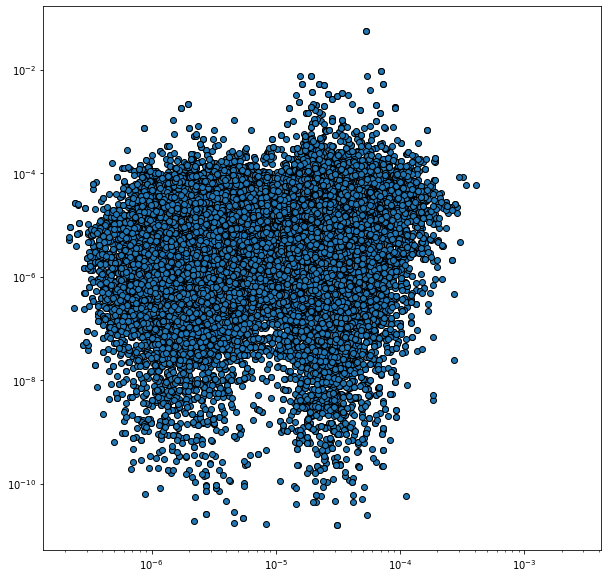

In [2]:
# delete 0
model = ODM_tot["trip_weight"].values
index = []
length = probability_survey.shape[0]

for i in range(0, length):
    if probability_survey[i] == 0:
        index.append(i) 

probability_survey = np.delete(probability_survey, index)
model_withoutZero = np.delete(model, index)

sum_model = model_withoutZero.sum()
probability_model = np.divide(model_withoutZero, sum_model)


fig, ax = plt.subplots(figsize=(10, 10))
plt.xscale('log')
plt.yscale('log')
ax.scatter(probability_survey, probability_model, facecolor='C0', edgecolor='k')



In [6]:
print(probability_survey)
print(probability_model)
print(len(probability_model))
print(len(probability_survey))

[8.42069944e-06 3.73769513e-05 8.43803511e-06 ... 2.41833027e-05
 1.77147009e-05 4.83666053e-05]
[2.43091725e-04 1.43232878e-05 8.42285330e-06 ... 5.90990452e-05
 6.15862262e-05 0.00000000e+00]
40162
40162


In [7]:
model_sum = np.sum(probability_model)
survey_sum = np.sum(probability_survey)

numerator = 0
denominator = 0

for i in range(0, len(probability_survey)):
    v_model = probability_model[i]
    v_survey = probability_survey[i]

    numerator  = numerator + min(v_survey, v_model)

denominator = model_sum + survey_sum

SSI = 2 * numerator / denominator
print(SSI)

0.2793217467814995
